<a href="https://colab.research.google.com/github/pujab21/breast-cancer-ml-models/blob/main/seer_breast_cancer_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Dataset initialization


In [ ]:
file_path = '/content/drive/MyDrive/Copy of SEER_Data_2024.txt'

column_names = [
    "Age", "Race", "Sex",
    "Year of diagnosis", "AJCC ID", "AJCC stage 3rd edition (1988-2003)",
    "Breast - Adjusted AJCC 6th M (1988-2015)", "Breast - Adjusted AJCC 6th N (1988-2015)",
    "Breast - Adjusted AJCC 6th T (1988-2015)", "Breast - Adjusted AJCC 6th Stage (1988-2015)",
    "Behavior code ICD-O-3", "Behavior recode for analysis", "Chemotherapy recode",
    "CS mets at dx (2004-2015)", "CS Mets Eval (2004-2015)", "ER Status",
    "Race/ethnicity", "CS extension (2004-2015)", "Derived Summary Grade",
    "Grade Clinical", "Grade Pathological", "Grade Recode",
    "Histologic Type ICD-O-3", "Histology recode", "Laterality",
    "CS lymph nodes (2004-2015)", "Marital status", "Median household income",
    "Regional nodes positive", "PR Status", "Primary Site",
    "Radiation", "Regional nodes examined", "SEER modified AJCC stage 3rd (1988-2003)",
    "Site specific surgery (1973-1997 varying detail by year and site)", "Summary stage 2000 (1998-2017)",
    "Surgery of oth reg/dis sites (1998-2002)", "Survival months", "Survival months flag",
    "Tumor marker 1 (1990-2003)", "Tumor marker 2 (1990-2003)", "Tumor marker 3 (1998-2003)",
    "CS tumor size (2004-2015)", "Tumor Size Summary"
]

dfinit = pd.read_csv(
    file_path,
    delimiter='\t',
    encoding='utf-8',
    na_values=' ',
    keep_default_na=False,
    low_memory=False,
    names=column_names,
    header=None
)

#dfinit.to_csv("initialdf.csv")


#filtering out cases beyond 2018
cols2018 =  ["Age", "Sex","Race/ethnicity","Year of diagnosis", "Behavior code ICD-O-3", "Behavior recode for analysis", "Chemotherapy recode",
     "ER Status","Derived Summary Grade","Grade Clinical", "Grade Pathological", "Grade Recode","Histologic Type ICD-O-3", "Histology recode", "Laterality",
    "Marital status", "Median household income","Regional nodes positive", "PR Status", "Primary Site","Radiation", "Regional nodes examined","Survival months", "Survival months flag",
     "Tumor Size Summary"]


df2018 = dfinit[
    (dfinit["Year of diagnosis"] > 2017) &
    (dfinit['AJCC ID'] == 'Breast Invasive')
].loc[:, cols2018]

df2018.reset_index(drop = True)

,Age,Sex,Race/ethnicity,Year of diagnosis,Behavior code ICD-O-3,Behavior recode for analysis,Chemotherapy recode,ER Status,Derived Summary Grade,Grade Clinical,...,Marital status,Median household income,Regional nodes positive,PR Status,Primary Site,Radiation,Regional nodes examined,Survival months,Survival months flag,Tumor Size Summary
0,15-19 years,Female,White,2018,Malignant,Malignant,Yes,Negative,3,2,...,Married (including common law),"$110,000 - $119,999",01,Negative,504,Beam radiation,03,0043,Complete dates are available and there are mor...,020
1,15-19 years,Female,White,2019,Malignant,Malignant,Yes,Positive,3,3,...,Single (never married),"$120,000+",00,Positive,508,None/Unknown,04,0026,Complete dates are available and there are mor...,015
2,15-19 years,Female,American Indian/Alaska Native,2018,Malignant,Malignant,Yes,Positive,9,9,...,Single (never married),"$50,000 - $54,999",02,Positive,504,None/Unknown,10,0042,Complete dates are available and there are mor...,999
3,20-24 years,Female,Other,2018,Malignant,Malignant,Yes,Negative,3,3,...,Unknown,"$70,000 - $74,999",00,Negative,504,Beam radiation,05,0046,Complete dates are available and there are mor...,057
4,20-24 years,Female,White,2018,Malignant,Malignant,Yes,Positive,3,3,...,Single (never married),"$60,000 - $64,999",07,Positive,505,Beam radiation,11,0045,Complete dates are available and there are mor...,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88241,85+ years,Female,White,2020,Malignant,Malignant,No/Unknown,Positive,1,1,...,Widowed,"$90,000 - $94,999",95,Positive,505,None/Unknown,95,0018,Complete dates are available and there are mor...,015
88242,85+ years,Female,White,2021,Malignant,Malignant,No/Unknown,Negative,2,2,...,Divorced,"$80,000 - $84,999",01,Negative,504,None/Unknown,01,0011,Complete dates are available and there are mor...,025
88243,85+ years,Female,White,2019,Malignant,Malignant,No/Unknown,Positive,1,1,...,Married (including common law),"$60,000 - $64,999",00,Positive,504,Beam radiation,05,0035,Complete dates are available and there are mor...,011
88244,85+ years,Female,White,2021,Malignant,Malignant,No/Unknown,Positive,2,2,...,Widowed,"$90,000 - $94,999",98,Positive,505,None/Unknown,00,0003,Complete dates are available and there are mor...,037


##Reading Data Directly from previously extracted subset of Data

In [ ]:
# # prompt: https://drive.google.com/file/d/1kVrqvA_a4YFd41_aZljzvVE7BJ4rBOH-/view?usp=sharing read the data from here

# !gdown --id 1kVrqvA_a4YFd41_aZljzvVE7BJ4rBOH- -O '/content/SEER_Data_2024.txt'

# file_path = '/content/SEER_Data_2024.txt'

# column_names = [
#     "Age", "Race", "Sex",
#     "Year of diagnosis", "AJCC ID", "AJCC stage 3rd edition (1988-2003)",
#     "Breast - Adjusted AJCC 6th M (1988-2015)", "Breast - Adjusted AJCC 6th N (1988-2015)",
#     "Breast - Adjusted AJCC 6th T (1988-2015)", "Breast - Adjusted AJCC 6th Stage (1988-2015)",
#     "Behavior code ICD-O-3", "Behavior recode for analysis", "Chemotherapy recode",
#     "CS mets at dx (2004-2015)", "CS Mets Eval (2004-2015)", "ER Status",
#     "Race/ethnicity", "CS extension (2004-2015)", "Derived Summary Grade",
#     "Grade Clinical", "Grade Pathological", "Grade Recode",
#     "Histologic Type ICD-O-3", "Histology recode", "Laterality",
#     "CS lymph nodes (2004-2015)", "Marital status", "Median household income",
#     "Regional nodes positive", "PR Status", "Primary Site",
#     "Radiation", "Regional nodes examined", "SEER modified AJCC stage 3rd (1988-2003)",
#     "Site specific surgery (1973-1997 varying detail by year and site)", "Summary stage 2000 (1998-2017)",
#     "Surgery of oth reg/dis sites (1998-2002)", "Survival months", "Survival months flag",
#     "Tumor marker 1 (1990-2003)", "Tumor marker 2 (1990-2003)", "Tumor marker 3 (1998-2003)",
#     "CS tumor size (2004-2015)", "Tumor Size Summary"
# ]

# dfinit = pd.read_csv(
#     file_path,
#     delimiter='\t',
#     encoding='utf-8',
#     na_values=' ',
#     keep_default_na=False,
#     low_memory=False,
#     names=column_names,
#     header=None
# )

# #dfinit.to_csv("initialdf.csv")


# #filtering out cases beyond 2018
# cols2018 =  ["Age", "Sex","Race/ethnicity","Year of diagnosis", "Behavior code ICD-O-3", "Behavior recode for analysis", "Chemotherapy recode",
#      "ER Status","Derived Summary Grade","Grade Clinical", "Grade Pathological", "Grade Recode","Histologic Type ICD-O-3", "Histology recode", "Laterality",
#     "Marital status", "Median household income","Regional nodes positive", "PR Status", "Primary Site","Radiation", "Regional nodes examined","Survival months", "Survival months flag",
#      "Tumor Size Summary"]


# df2018 = dfinit[
#     (dfinit["Year of diagnosis"] > 2017) &
#     (dfinit['AJCC ID'] == 'Breast Invasive')
# ].loc[:, cols2018]

# df2018.reset_index(drop = True, inplace=True)

# print(df2018.head())

In [ ]:
# #read the 2018+ data directly
# df2018 = pd.read_csv("/content/SEER_2018.csv")
# df2018.drop(columns = ["Unnamed: 0"],inplace = True)

##Understanding the data

In [ ]:
#df2018.shape

#df2018.head()

#df2018.info()

#df2018.describe()

#df2018.duplicated().sum()

#Data Cleaning and Data Preprocessing

In [ ]:
df = df2018.copy()

##Removing columns not required for classification

In [ ]:
#Note by Puja:
#drop columns with only 1 value
#drop Histologic Type ICD-O-3 as Histology recode is present to convey same data
df.drop(columns = ['Behavior code ICD-O-3','Behavior recode for analysis','Grade Recode','Histologic Type ICD-O-3'],inplace = True)

##Handling Survival months flag for target Variable Creation

In [ ]:
#to understand the threshold we can define for survivability
#df2021 = df[df["Year of diagnosis"] == 2021]
#df2021["Survival months"].value_counts()

#Note by Puja:
#The max data available is 11 Months: Let us take our definition of survivability 6 Months cancer free

#Understanding the different survival flags
#df["Survival months flag"].value_counts()

#df[df["Survival months flag"]=="Complete dates are available and there are 0 days of survival"]["Survival months"].value_counts()


In [ ]:
#Note by Puja:
# drop 'Incomplete dates are available and there cannot be zero days of follow-up',
#and 'Incomplete dates are available and there could be zero days of follow-up'
#and 'Not calculated because a Death Certificate Only or Autopsy Only case	30' as they are not relevant to our main objective
#keep only complete dates available
#We can drop the Survival Months values where it is 'Not calculated because a Death Certificate Only or Autopsy Only case', as we are only dealing with survivability prediction based on survival from cancer and we
#and we hence ignore cases where we don't know the cause of death
filter_vals = ['Complete dates are available and there are more than 0 days of survival','Complete dates are available and there are 0 days of survival']
df = df[df['Survival months flag'].isin(filter_vals)]

## Remove Duplicates

In [ ]:
df.duplicated().sum()

np.int64(9)

In [ ]:
df.drop_duplicates(keep="first",inplace = True)

In [ ]:
df.shape

(87722, 21)

## Handling Missing Values

###Handling Blank(s)


In [ ]:
#First Handling the presence of 'Blank(s)' - P
blanksvalues = []
for i in df.columns:
  if "Blank(s)" in df[i].unique():
    blanksvalues.append(i)
    print(i,df[i].value_counts().get("Blank(s)"))
print(blanksvalues)

[]


###Handle the 'Unknown' values


In [ ]:
#Next handle the 'Unknown' values - P
df = df.replace('Unknown', np.nan)
unknownvalues = []
for column in df.columns:
    if df[column].isnull().any():
        unknownvalues.append(column)
        print(column, df[column].isnull().sum())  # Count of NaN values
print(unknownvalues)

Race/ethnicity 417
Marital status 4502
['Race/ethnicity', 'Marital status']


In [ ]:
#Imputation using Age, mode (age has the highest correlation)
mode_values = df.groupby('Age')['Marital status'].agg(lambda x: x.mode()[0])
df['Marital status'].fillna(df['Age'].map(mode_values),inplace = True)

/tmp/ipython-input-14-505595383.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Marital status'].fillna(df['Age'].map(mode_values),inplace = True)


In [ ]:
#print(df["Median household income"].value_counts().get('Unknown/missing/no match/Not 1990-2022'))
#Only 6 values so drop those values
#print(df['ER Status'].value_counts().get('Borderline/Unknown'))
#print(df['PR Status'].value_counts().get('Borderline/Unknown'))
#print(df['Radiation'].value_counts().get('Recommended, unknown if administered'))

In [ ]:
#drop the unknown values in ER and PR status
df = df.replace('Borderline/Unknown', np.nan)
#drop unknown in radiation
df = df.replace('Recommended, unknown if administered', np.nan)
#drop unknown in laterality
df = df.replace('Paired site, but no information concerning laterality', np.nan)
df = df.replace('Only one side - side unspecified', np.nan)
#drop unknowns in median household income
df = df.replace('Unknown/missing/no match/Not 1990-2022',np.nan)

In [ ]:
df.dropna(subset = ["Race/ethnicity",'Median household income',"ER Status","PR Status","Radiation","Laterality"],inplace = True)

In [ ]:
df.shape

(83456, 21)

##Fix Structural errors

In [ ]:
#columns which should have datatype as integer which are currently string format
#are 'Regional nodes positive', 'Regional nodes examined', 'Tumor Size Summary' ,'Survival months'
df['Regional nodes positive'] = df['Regional nodes positive'].astype(int)
df['Regional nodes examined'] = df['Regional nodes examined'].astype(int)
df['Tumor Size Summary'] = df['Tumor Size Summary'].astype(int)
df['Survival months'] = df['Survival months'].astype(int)


In [ ]:
df = df.replace(r' \([0-9]{4}\+\)','',regex = True)

###Handling Race

In [ ]:
#combine the NOS regions
df['Race/ethnicity'] = df['Race/ethnicity'].str.replace(', NOS', '', regex=False)

In [ ]:
nos_mapping = {
    'Asian Indian': 'Asian Indian or Pakistani',
    'Pakistani': 'Asian Indian or Pakistani',
    'Hawaiian': 'Pacific Islander',
    'Samoan': 'Pacific Islander',
    'Tongan': 'Pacific Islander',
    'Fiji Islander': 'Pacific Islander',
    'Guamanian': 'Pacific Islander',
    'Polynesian': 'Pacific Islander',
    'Micronesian': 'Pacific Islander',
    'Chamorran': 'Pacific Islander',
    'Thai':'Other Asian',
    'Kampuchean':'Other Asian',
    'Laotian':'Other Asian',
    'Hmong':'Other Asian',
    'Tahitian':'Pacific Islander'

}

df['Race/ethnicity'] = df['Race/ethnicity'].replace(nos_mapping)

grouping_mapping = {
    'White': 'White',
    'Black': 'Black',
    'Chinese': 'Asian',
    'Filipino': 'Asian',
    'Other Asian': 'Asian',
    'Japanese': 'Asian',
    'Pacific Islander': 'Pacific Islander',
    'Asian Indian or Pakistani': 'Asian',
    'American Indian/Alaska Native': 'Native American',
    'Korean': 'Asian',
    'Vietnamese': 'Asian',
    'Other': 'Other'
}

# Map the Race/Ethnicity to broader categories
df['Race/ethnicity'] = df['Race/ethnicity'].replace(grouping_mapping)

###Handling Radiation


In [ ]:
#combine refused and none
df.replace('Refused', 'None/Unknown', inplace=True)
df = df[~df['Radiation'].str.contains('NOS', na=False)]

##Outliers Handling

In [ ]:
#plot boxplot for each outlier
def box_plot(df,col):
  plt.figure(figsize=(10, 6))
  plt.boxplot(df[col])
  plt.title(f'Boxplot of {col}')
  plt.ylabel(f'Count of f{col}')
  plt.grid(True)
  plt.show()

#regional nodes outlier calculation
def outliers(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(len(outliers))
  return outliers.index

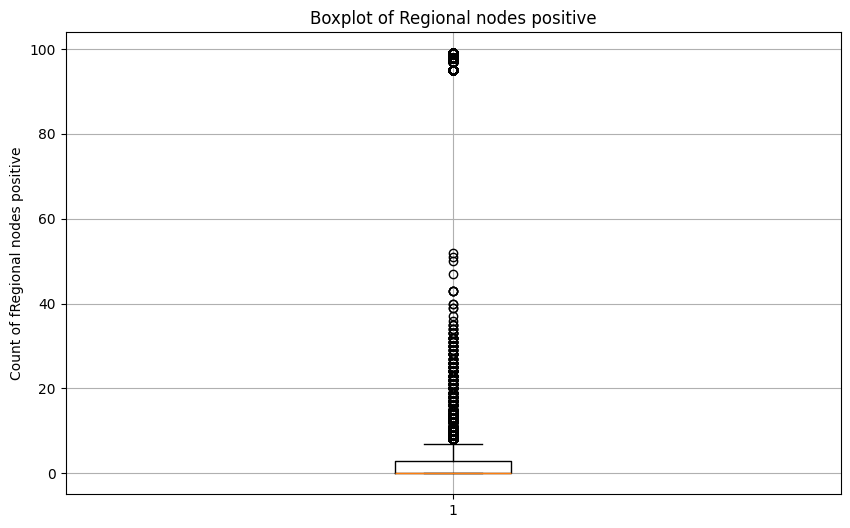

18275


In [ ]:
box_plot(df, 'Regional nodes positive')
out = outliers(df, 'Regional nodes positive')
#df.drop(out, inplace = True)

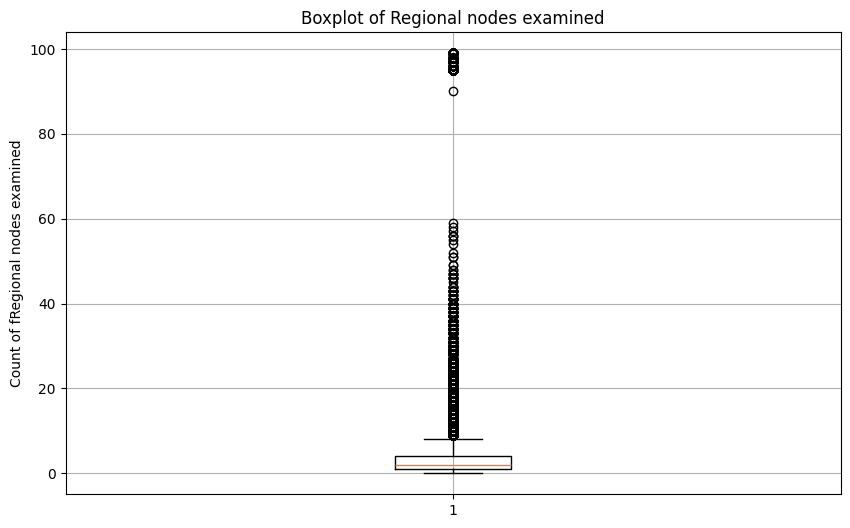

11442


In [ ]:
box_plot(df, 'Regional nodes examined')
out = outliers(df, 'Regional nodes examined')
#df.drop(out, inplace = True)

0


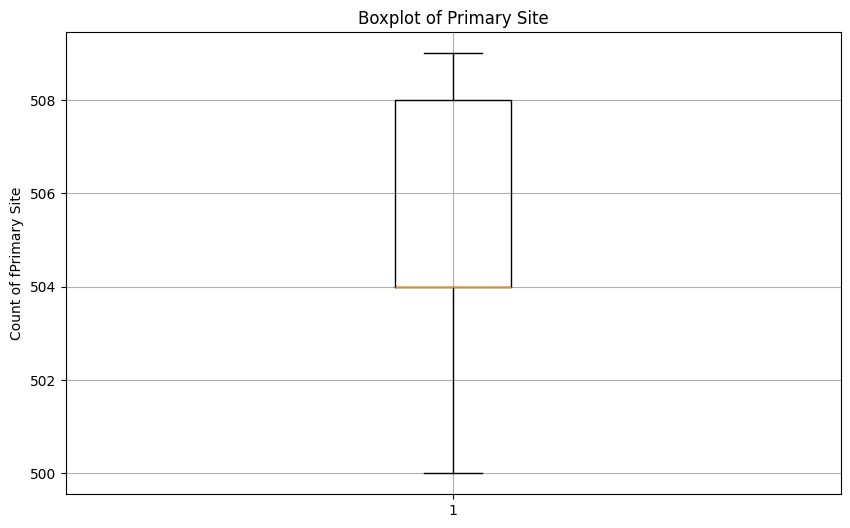

In [ ]:
out = outliers(df, 'Primary Site')
box_plot(df, 'Primary Site')
#df.drop(out, inplace = True)

6663


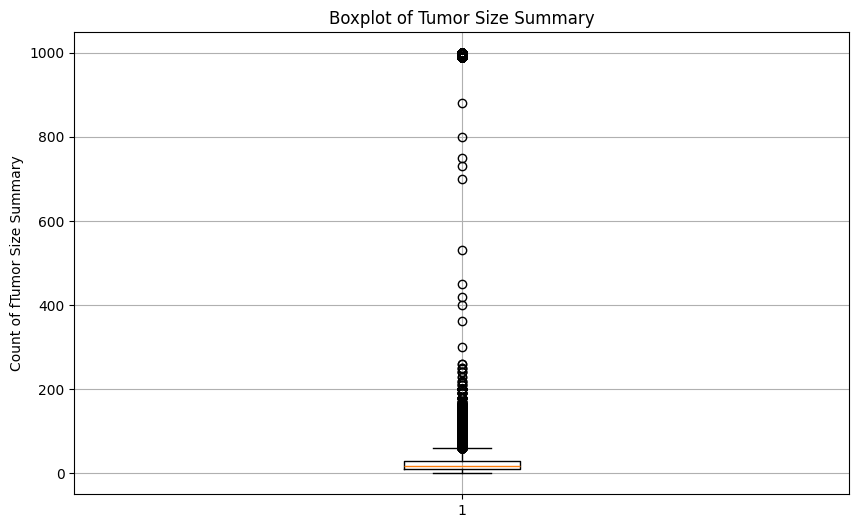

In [ ]:
out = outliers(df, 'Tumor Size Summary')
box_plot(df, 'Tumor Size Summary')
#df.drop(out, inplace = True)

#not handling outliers of Survival months as they are the target variable(before translation)

##Data Transformation

###Standardization and Normalization

In [ ]:
#required before algorithms like KNN, SVM,etc
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def minmaxnormalize(data):
    return (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))


In [ ]:
df.loc[:,['Regional nodes examined','Regional nodes positive','Tumor Size Summary']] = scaler.fit_transform(df.loc[:,['Regional nodes examined','Regional nodes positive','Tumor Size Summary']])

df['Primary Site'] = minmaxnormalize(df['Primary Site'])

/tmp/ipython-input-30-1403959080.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.23144809 -0.17692611  0.15020581 ... -0.12240412 -0.39501405
 -0.39501405]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,['Regional nodes examined','Regional nodes positive','Tumor Size Summary']] = scaler.fit_transform(df.loc[:,['Regional nodes examined','Regional nodes positive','Tumor Size Summary']])
/tmp/ipython-input-30-1403959080.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.49552241 -0.5212865  -0.46975832 ... -0.5212865   2.00359407
  2.00359407]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,['Regional nodes examined','Regional nodes positive','Tumor Size Summary']] = scaler.fit_transform(df.loc[:,['Regional nodes examined','Regional 

###Target Variable Generation

In [ ]:
threshold = 6 #6 months
df["Survived"] = df["Survival months"].apply(lambda x: 0 if x<= threshold else 1)

In [ ]:
#will drop Survival months, year of diagnosis once target var generation completed
# df.drop(columns = ['Survival months flag','Year of diagnosis',"Survival months"], inplace = True)

#Feature Selection

In [ ]:
#chi squared test for 2 categorical columns:
from scipy.stats import chi2_contingency
def chi_squared_test(df, col1, col2):
  contingency_table = pd.crosstab(df[col1], df[col2])
  print(contingency_table)
  chi2, p, dof, expected = chi2_contingency(contingency_table)
  print(f"Chi^2 test for {col1} and {col2}")
  print("Chi^2 value: ",chi2)
  print("P-value: ",p)
  return chi2, p


def cramers_v(df, var1, var2):
  crosstab = pd.crosstab(df[var1], df[var2])
  chi2 = chi2_contingency(crosstab)[0]
  n = crosstab.sum().sum()
  phi2 = chi2 / n
  r, k = crosstab.shape
  phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
  rcorr = r - ((r - 1)**2) / (n - 1)
  kcorr = k - ((k - 1)**2) / (n - 1)
  res = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
  print(f"Cramer's V between {var1} and {var2}: {res}")
  return res

##PCA FOR NUMERICAL VALUES

In [ ]:
#Note: Did not choose t-SNE as I wanted to preserve the variance - Puja

from sklearn.decomposition import PCA
def pca_feature(df, columns):
  x = df.loc[:, columns]
  pca = PCA(n_components=1)
  principalComponents = pca.fit_transform(x)
  df['PCA_1'] = principalComponents
  return df

In [ ]:
correlation_matrix = df[['Regional nodes positive', 'Regional nodes examined', 'Tumor Size Summary','Primary Site']].corr(method='pearson')
correlation_matrix

,Regional nodes positive,Regional nodes examined,Tumor Size Summary,Primary Site
Regional nodes positive,1.000000,0.252523,0.191173,0.060333
Regional nodes examined,0.252523,1.000000,0.119772,0.055067
Tumor Size Summary,0.191173,0.119772,1.000000,0.081869
Primary Site,0.060333,0.055067,0.081869,1.000000


In [ ]:
'''pca_vars = ['Regional nodes positive', 'Regional nodes examined']
df = pca_feature(df, pca_vars)
df.drop(columns = pca_vars,inplace = True)'''

"pca_vars = ['Regional nodes positive', 'Regional nodes examined']\ndf = pca_feature(df, pca_vars)\ndf.drop(columns = pca_vars,inplace = True)"

##Comparing Categorical Variables

In [ ]:
#The reasons why I am performing these tests: - Puja
#1. Chi square: to test both independence and association
#2. Cramers V: to check the strength of association

###Comparing Grade Clinical and Grade Pathological

In [ ]:
chi_squared_test(df,'Grade Clinical','Grade Pathological')

cramers_v_result = cramers_v(df, 'Grade Clinical', 'Grade Pathological')

#Statistically Significant values (p == 0) and moderate association (Cramer's V = 0.3)
#However p value might be skewed due to large size of sample
#So moderate association
# - Puja

Grade Pathological      1      2     3     9   A   B   C  D   H  L   M
Grade Clinical                                                        
1                   14540   4739   236  1992  15   3   1  0   1  4   7
2                     437  21254  3577  7418   3  20   4  0   8  1   7
3                      18    176  7363  9405   1   2   9  1   5  0   0
9                    1659   1935   831  2211  13  23  16  3  23  3  20
A                     429    135    10    68  49   7   0  0   0  1   1
B                     192    607   117   228   4  68   9  0   0  0   1
C                      10     91   237   441   3   1  47  0   0  0   0
D                       0      8    20    60   0   0   0  6   0  0   0
H                     167    522   369   221   0   8   2  2  52  0   4
L                     157     70     6    25   0   4   0  0   0  6   4
M                     309    432    35    92   1   0   0  0   6  0  13
Chi^2 test for Grade Clinical and Grade Pathological
Chi^2 value:  81705.3620

###ER and PR Status


In [ ]:
#ER vs PR Status
chi_squared_test(df,'ER Status','PR Status')

cramers_v(df, 'ER Status', 'PR Status')

#Statistically significant, moderately strong association - Puja

PR Status  Negative  Positive
ER Status                    
Negative      11362       602
Positive       9986     61391
Chi^2 test for ER Status and PR Status
Chi^2 value:  35259.202279582554
P-value:  0.0
Cramer's V between ER Status and PR Status: 0.6504341489384995


np.float64(0.6504341489384995)

In [ ]:
#PR vs Survived
chi_squared_test(df,'PR Status','Survived')

cramers_v(df, 'PR Status', 'Survived')

Survived       0      1
PR Status              
Negative    3983  17365
Positive   10838  51155
Chi^2 test for PR Status and Survived
Chi^2 value:  14.911102016714132
P-value:  0.00011269780518777282
Cramer's V between PR Status and Survived: 0.012919741741149108


np.float64(0.012919741741149108)

In [ ]:
#ER vs Survived
chi_squared_test(df,'ER Status','Survived')

cramers_v(df, 'ER Status', 'Survived')

Survived       0      1
ER Status              
Negative    2255   9709
Positive   12566  58811
Chi^2 test for ER Status and Survived
Chi^2 value:  10.744709073541967
P-value:  0.0010457787988013552
Cramer's V between ER Status and Survived: 0.010813279370755147


np.float64(0.010813279370755147)

In [ ]:
#PR HAS A HIGHER Chi2 value and a higher cramers value
#Drop PR Status from df - Puja
#df.drop(columns ="ER Status", inplace = True)

#Data Transformation -Encoding


###Encoding

In [ ]:
le_vars = ['Sex',"Age","Median household income",'PR Status', 'ER Status','Derived Summary Grade','Grade Clinical','Grade Pathological','Histology recode' ] #
oh_vars = ['Laterality', 'Marital status','Radiation','Chemotherapy recode','Race/ethnicity']

####Label/One Hot Encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


def label_encoding(df, label_vars):
    encoders = {}
    for var in label_vars:
        if var not in df.columns:
            raise ValueError(f"Column '{var}' does not exist in the DataFrame.")

        encoder = LabelEncoder()
        df[var] = encoder.fit_transform(df[var])
        encoders[var] = encoder
    return df, encoders

def one_hot_encoding(df, onehot_vars):
    encoders = {}
    for var in onehot_vars:
        if var not in df.columns:
            raise ValueError(f"Column '{var}' does not exist in the DataFrame.")
        one_hot = pd.get_dummies(df[var], prefix=var, drop_first=True)
        df = pd.concat([df, one_hot], axis=1)
        df.drop(var, axis=1, inplace=True)
        encoders[var] = one_hot.columns.tolist()
    return df, encoders

def ordinal_encoder(df, ordinal_vars):
    encoders = {}
    for var, categories in ordinal_vars.items():
        if var not in df.columns:
            raise ValueError(f"Column '{var}' does not exist in the DataFrame.")
        encoder = OrdinalEncoder(categories=[categories])
        df[var] = encoder.fit_transform(df[[var]])
        encoders[var] = encoder
    return df, encoders


###Performing the encoding

In [ ]:
#initially
dfencoded1, encoders = label_encoding(df.copy(), le_vars)
dfencoded2, encoders = one_hot_encoding(dfencoded1, oh_vars)

In [ ]:
dfencoded = dfencoded2.copy()

In [ ]:
pd.set_option('display.max_columns', None)
dfencoded.head(5)

,Age,Sex,Year of diagnosis,ER Status,Derived Summary Grade,Grade Clinical,Grade Pathological,Histology recode,Median household income,Regional nodes positive,PR Status,Primary Site,Regional nodes examined,Survival months,Survival months flag,Tumor Size Summary,Survived,Laterality_Left - origin of primary,Laterality_Right - origin of primary,Marital status_Married (including common law),Marital status_Separated,Marital status_Single (never married),Marital status_Unmarried or Domestic Partner,Marital status_Widowed,Radiation_Combination of beam with implants or isotopes,Radiation_None/Unknown,Radiation_Radioactive implants (includes brachytherapy),Radiation_Radioisotopes,Chemotherapy recode_Yes,Race/ethnicity_Black,Race/ethnicity_Native American,Race/ethnicity_Other,Race/ethnicity_Pacific Islander,Race/ethnicity_White
36042,0,0,2018,0,2,1,2,7,1,-0.495522,0,0.444444,-0.231448,43,Complete dates are available and there are mor...,-0.197664,1,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
36199,0,0,2019,1,2,2,2,7,2,-0.521286,1,0.888889,-0.176926,26,Complete dates are available and there are mor...,-0.225953,1,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True
46723,0,0,2018,1,3,3,3,7,5,-0.469758,1,0.444444,0.150206,42,Complete dates are available and there are mor...,5.341229,1,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False
49994,1,0,2018,0,2,2,3,7,9,-0.521286,0,0.444444,-0.122404,46,Complete dates are available and there are mor...,0.011671,1,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False
50001,1,0,2018,1,2,2,3,7,7,-0.340938,1,0.555556,0.204728,45,Complete dates are available and there are mor...,0.254952,1,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True


#Rearranging the Column to put survived at the end

In [ ]:
pd.set_option('display.max_columns', None)
dfencoded.head(5)

,Age,Sex,Year of diagnosis,ER Status,Derived Summary Grade,Grade Clinical,Grade Pathological,Histology recode,Median household income,Regional nodes positive,PR Status,Primary Site,Regional nodes examined,Survival months,Survival months flag,Tumor Size Summary,Survived,Laterality_Left - origin of primary,Laterality_Right - origin of primary,Marital status_Married (including common law),Marital status_Separated,Marital status_Single (never married),Marital status_Unmarried or Domestic Partner,Marital status_Widowed,Radiation_Combination of beam with implants or isotopes,Radiation_None/Unknown,Radiation_Radioactive implants (includes brachytherapy),Radiation_Radioisotopes,Chemotherapy recode_Yes,Race/ethnicity_Black,Race/ethnicity_Native American,Race/ethnicity_Other,Race/ethnicity_Pacific Islander,Race/ethnicity_White
36042,0,0,2018,0,2,1,2,7,1,-0.495522,0,0.444444,-0.231448,43,Complete dates are available and there are mor...,-0.197664,1,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
36199,0,0,2019,1,2,2,2,7,2,-0.521286,1,0.888889,-0.176926,26,Complete dates are available and there are mor...,-0.225953,1,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True
46723,0,0,2018,1,3,3,3,7,5,-0.469758,1,0.444444,0.150206,42,Complete dates are available and there are mor...,5.341229,1,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False
49994,1,0,2018,0,2,2,3,7,9,-0.521286,0,0.444444,-0.122404,46,Complete dates are available and there are mor...,0.011671,1,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False
50001,1,0,2018,1,2,2,3,7,7,-0.340938,1,0.555556,0.204728,45,Complete dates are available and there are mor...,0.254952,1,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True


In [ ]:
c = list(df.columns)
c.remove("Survived")
c.append("Survived")
df = df[c]

In [ ]:
c

['Age',
 'Sex',
 'Race/ethnicity',
 'Year of diagnosis',
 'Chemotherapy recode',
 'ER Status',
 'Derived Summary Grade',
 'Grade Clinical',
 'Grade Pathological',
 'Histology recode',
 'Laterality',
 'Marital status',
 'Median household income',
 'Regional nodes positive',
 'PR Status',
 'Primary Site',
 'Radiation',
 'Regional nodes examined',
 'Survival months',
 'Survival months flag',
 'Tumor Size Summary',
 'Survived']

In [ ]:
#exporting to csv
# df.to_csv('df_transformed.csv', index=False)
dfencoded.to_csv('dfencoded_rsf.csv', index=False)

In [ ]:
# df.dropna(inplace=True)
dfencoded.dropna(inplace=True)

In [ ]:
from google.colab import files
# files.download('df_transformed.csv')
files.download('dfencoded_rsf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>